# Time series elongation

### Packages - install if needed

## Imports

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '14'

import numpy as np
import scipy as sp

import pandas as pd
import seaborn as sns
import random

#import ppscore as pps
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [54]:
import eda_utils as eda

In [55]:
import importlib
importlib.reload(eda);

In [56]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# Load Data - from file

In [57]:
filename = "nasdaq_stocks.csv"
data = pd.read_csv(filename)
print(data.shape)
data.head(5)

(808, 18)


,date,FB,GOOGL,AMZN,DELL,IBM,INTC,AAPL,MSFT,CSCO,ORCL,NVDA,VMW,HPQ,AMD,TSM,TXN,QCOM
0,2016-01-04,102.22,759.44,636.99,NaN,119.2253,31.0178,99.4989,51.0656,23.9163,34.1057,31.8157,46.7698,10.5034,2.770,20.1865,49.9251,44.2740
1,2016-01-05,102.73,761.53,633.79,NaN,119.1376,30.8718,97.0055,51.2986,23.8076,34.0008,32.3268,47.3679,10.6030,2.750,20.0586,49.4014,43.4083
2,2016-01-06,102.97,759.33,632.65,NaN,118.5413,30.1874,95.1072,50.3667,23.5541,34.1725,30.9901,45.8975,10.2227,2.505,19.5012,49.0798,42.9666
3,2016-01-07,97.92,741.00,607.94,NaN,116.5155,29.0558,91.0932,48.6148,23.0107,33.4284,29.7615,45.2911,9.7519,2.275,19.2818,47.4996,40.7582
4,2016-01-08,97.33,730.91,607.05,NaN,115.4368,28.7547,91.5749,48.7639,22.4402,33.0563,29.1226,44.9422,9.5798,2.140,19.0168,46.2684,40.5241


# Try to infer Dates automatically

In [58]:
data = eda.infer_date_col(data, timezone_conversion=False)
data.head(3)

col: date was transformed to date


,date,FB,GOOGL,AMZN,DELL,IBM,INTC,AAPL,MSFT,CSCO,ORCL,NVDA,VMW,HPQ,AMD,TSM,TXN,QCOM
0,2016-01-04,102.22,759.44,636.99,NaN,119.2253,31.0178,99.4989,51.0656,23.9163,34.1057,31.8157,46.7698,10.5034,2.770,20.1865,49.9251,44.2740
1,2016-01-05,102.73,761.53,633.79,NaN,119.1376,30.8718,97.0055,51.2986,23.8076,34.0008,32.3268,47.3679,10.6030,2.750,20.0586,49.4014,43.4083
2,2016-01-06,102.97,759.33,632.65,NaN,118.5413,30.1874,95.1072,50.3667,23.5541,34.1725,30.9901,45.8975,10.2227,2.505,19.5012,49.0798,42.9666


# Infer Frequency

In [59]:
col_date = "date"
max_date = data[col_date].max()
min_date = data[col_date].min()

rng = pd.date_range(start=min_date, end=max_date, periods=data.shape[0])
infered_freq = pd.infer_freq(rng, warn=True)
print("infered_freq:", infered_freq)

if infered_freq:
    rng_with_freq = pd.date_range(start=min_date, end=max_date, freq=infered_freq)
    if rng.shape[0] != rng_with_freq.shape[0]:
        print("There may be missing data")
    else:
        print("Infered frequency matches the number of observations")

infered_freq: None


In [60]:
rng

DatetimeIndex([          '2016-01-04 00:00:00',
               '2016-01-05 10:49:31.003717472',
               '2016-01-06 21:39:02.007434944',
               '2016-01-08 08:28:33.011152416',
               '2016-01-09 19:18:04.014869888',
               '2016-01-11 06:07:35.018587360',
               '2016-01-12 16:57:06.022304832',
               '2016-01-14 03:46:37.026022304',
               '2016-01-15 14:36:08.029739777',
               '2016-01-17 01:25:39.033457249',
               ...
               '2019-03-06 22:34:20.966542752',
               '2019-03-08 09:23:51.970260224',
               '2019-03-09 20:13:22.973977696',
               '2019-03-11 07:02:53.977695168',
               '2019-03-12 17:52:24.981412640',
               '2019-03-14 04:41:55.985130112',
               '2019-03-15 15:31:26.988847584',
               '2019-03-17 02:20:57.992565056',
               '2019-03-18 13:10:28.996282528',
                         '2019-03-20 00:00:00'],
              dtype=

In [61]:
col_date = "date"
data = data.sort_values(by=col_date)
data[col_date] = pd.to_datetime(data[col_date])
data = data.set_index(col_date)
data.head(3)

,FB,GOOGL,AMZN,DELL,IBM,INTC,AAPL,MSFT,CSCO,ORCL,NVDA,VMW,HPQ,AMD,TSM,TXN,QCOM
date,,,,,,,,,,,,,,,,,
2016-01-04,102.22,759.44,636.99,NaN,119.2253,31.0178,99.4989,51.0656,23.9163,34.1057,31.8157,46.7698,10.5034,2.770,20.1865,49.9251,44.2740
2016-01-05,102.73,761.53,633.79,NaN,119.1376,30.8718,97.0055,51.2986,23.8076,34.0008,32.3268,47.3679,10.6030,2.750,20.0586,49.4014,43.4083
2016-01-06,102.97,759.33,632.65,NaN,118.5413,30.1874,95.1072,50.3667,23.5541,34.1725,30.9901,45.8975,10.2227,2.505,19.5012,49.0798,42.9666


# Time series Elongation

## Functions

In [87]:
def generating_transition_dictionay(series):
    transition_dict = dict()
    series_values = series.values
    for i in range(len(series_values)-1):
        current_value = series_values[i]
        next_value = series_values[i+1]
        if current_value in transition_dict:
            transition_dict[current_value].append(next_value)
        else:
            transition_dict[current_value] = [next_value]
    return(transition_dict)        


def add_trend_with_multiplication_effect(new_series, trend_multiplication_effect):
    #trend_multiplication_effect = 1.5
    trend_series_size = new_series.shape[0]
    trend_series = pd.Series(np.nan, index=range(trend_series_size))
    trend_series[0] = 1
    trend_series[trend_series_size-1] = trend_multiplication_effect
    trend_series = trend_series.interpolate().round(3)
    return(trend_series)

def genrate_new_series(series, transition_dict, new_size, smooth_series):
    # Use different approches to grow the series, changing the use ratio of the methods will help with reaching the suitable grow
    series_values = series.values
    series_diff_values = series.diff().dropna().values
    new_ts_list = []
    current_value = random.choice(series_values) #series_values[-1]
    next_value = current_value
    for i in range(new_size):
        random_choice = random.choice([1,1,1,1,1,1,1,2]) # use ratio of the methods
        if random_choice == 0 and current_value in transition_dict:
            next_values_list = transition_dict[current_value]
            next_value = random.choice(next_values_list)
            new_ts_list.append(next_value)
        elif random_choice == 1:
            next_value = next_value + random.choice(series_diff_values) # Using diff value from diff population
            new_ts_list.append(next_value)
        elif random_choice == 2:
            new_ts_list.append(next_value) # using the same next value from the round before
        else:  
            next_value = random.choice(series_values)
            new_ts_list.append(next_value)

    new_ts_list = pd.Series(new_ts_list) 
    
    # Smooth series
    if smooth_series:
        new_ts_list = new_ts_list.rolling(3).median()
        new_ts_list = new_ts_list.rolling(5, win_type='triang').mean() # .rolling(3, win_type='triang').mean() / .rolling(3).median()
    new_ts_list = new_ts_list.fillna(method='ffill').fillna(method='bfill')

    return(new_ts_list)

def combine_series(series, new_series, freq, trend_multiplication_effect):
    old_series_list = list(series.values)
    
    if trend_multiplication_effect:
        trend_series = add_trend_with_multiplication_effect(new_series, trend_multiplication_effect)        
        new_series = new_series * trend_series
            
    new_series_list = list(new_series.values)
    old_series_list.extend(new_series_list)

    elongated_series = pd.Series(old_series_list)
    if freq:
        new_index = pd.date_range(start=series.index[0], periods=len(elongated_series), freq=freq)
        elongated_series = pd.DataFrame(elongated_series).set_index(new_index)[0]       
    return(elongated_series)


def time_series_elongation(series, added_size, freq=None, trend_multiplication_effect=None, limit_max_min=True, smooth_series=False):
    max_series = series.max()
    min_series = series.min()
    transition_dict = generating_transition_dictionay(series)
    new_series = genrate_new_series(series, transition_dict, added_size, smooth_series)
    combined_series = combine_series(series, new_series, freq, trend_multiplication_effect)
    if limit_max_min:
        combined_series[combined_series>max_series]=max_series
        combined_series[combined_series<min_series]=min_series
    return(combined_series)

    

## Elongation example

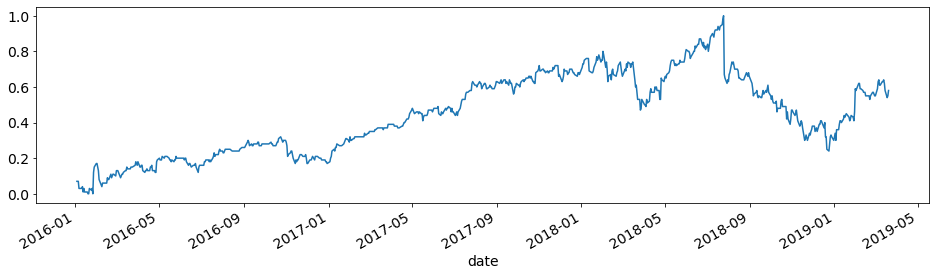

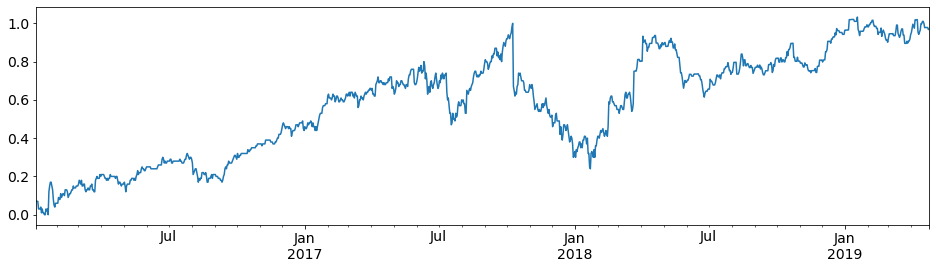

In [96]:
col = "FB"
series = data[col]
#series.plot(figsize=(16,4))

# Scaling series 
series_max = series.max()
series_min = series.min()
series = (series - series_min) / (series_max - series_min)
series = series.round(2)
series.plot(figsize=(16,4))
plt.show()

# Elongate series
# ************************* 
# In genrate_new_series function 
# Use different approches to grow the series, 
# changing the use ratio of the methods will help with reaching the suitable grow
# ************************* 
added_size = 400
freq = 'D'
trend_multiplication_effect = 1.1
limit_max_min = False
smooth_series=False
new_series = time_series_elongation(series, added_size, freq, trend_multiplication_effect, limit_max_min, smooth_series)
new_series.plot(figsize=(16,4))
plt.show()